## Analyzing speeches of Apple's iPhone and Google's Pixel launch event from 2018 and 2019

Following are the video links -
* Made by Google 2018 - https://www.youtube.com/watch?v=EsoQGTA1SxY
* Made by Google 2019 - https://www.youtube.com/watch?v=XKmsYB54zBk
* September Event 2018 — Apple - https://www.youtube.com/watch?v=wFTmQ27S7OQ
* September Event 2019 — Apple - https://www.youtube.com/watch?v=-rAeqN-Q7x4

I will use Markov chain generator in the end to generate some random sentences out of the 4 speeches.<br/>Markov chain generator - https://github.com/jsvine/markovify

In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import re, spacy,markovify
from collections import Counter
import seaborn as sns

In [2]:
sw = set(STOPWORDS)
nlp = spacy.load("en_core_web_sm")

def show_word_cloud(title,content):
    wordcloud = WordCloud(stopwords=sw,background_color = 'white',width=1500,height=1000).generate(content)
    
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    print(title)
    plt.show()

def find_adjectives(content):
    document = nlp(content)
    adjectives=[]
    for token in document:
        if(token.pos_=="ADJ" and token.lemma_ != "-"):
              adjectives.append(token.lemma_)
    return adjectives

In [3]:
#reading content of all the files
base_dir_of_subtitles="../input/sub-titles-of-presentations/"
file_names = ["Google-2018","Google-2019","Apple-2018","Apple-2019"]

file_content_array=[]
for file_name in file_names:
    file_content=open (base_dir_of_subtitles+file_name+".txt").read()

    #remove speaker names from content
    words_to_remove = re.findall(r'(\w+:)',file_content)

    for word in words_to_remove:
        file_content=file_content.replace(word,"")
        
    file_content_array.append(file_content)

Google-2018


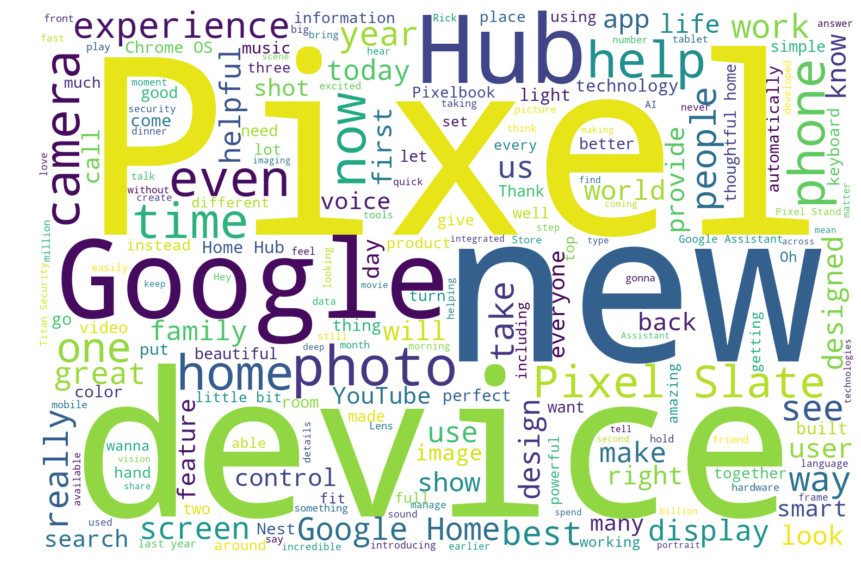

Google-2019


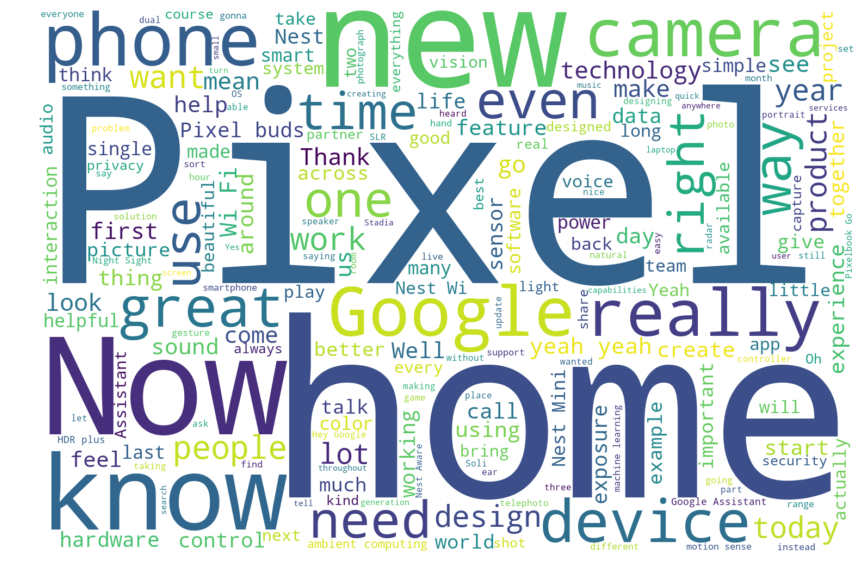

In [4]:
#word cloud of google speech
show_word_cloud(file_names[0],file_content_array[0])
show_word_cloud(file_names[1],file_content_array[1])

Apple-2018


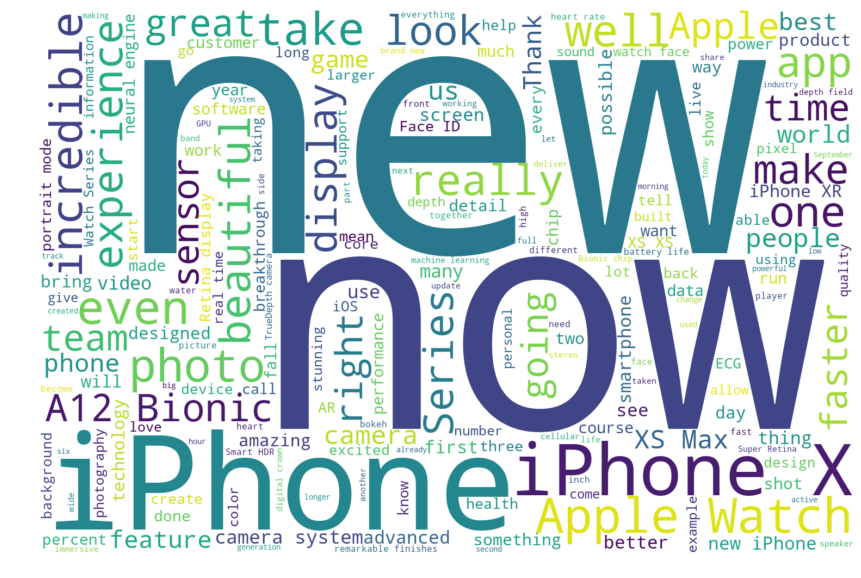

Apple-2019


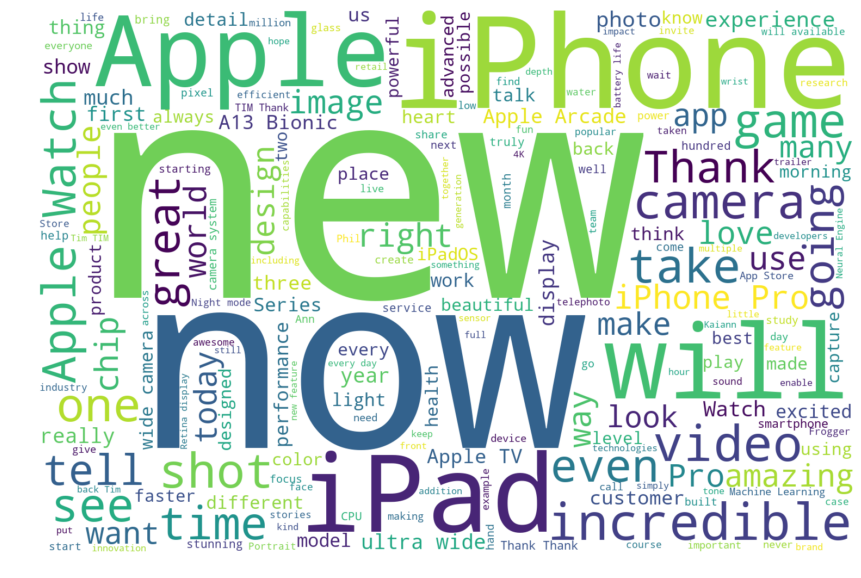

In [5]:
#word cloud of apple speech
show_word_cloud(file_names[2],file_content_array[2])
show_word_cloud(file_names[3],file_content_array[3])

**Observation**
* Looking at all of the 4 word clouds, one can easyily guess the number of products announced by Apple and Google in their respective speeches like Pixel, iPhone, iPad, Pixel Slate, Google Home and Apple Watch etc..

In [6]:
#Finding all adjectives in the speech using spaCy
adjectives_array=[]
for file_name in file_names:
    file_content=""
    file_content=open (base_dir_of_subtitles+file_name+".txt").read()
    adjectives_array.append(find_adjectives(file_content))

Google-2018


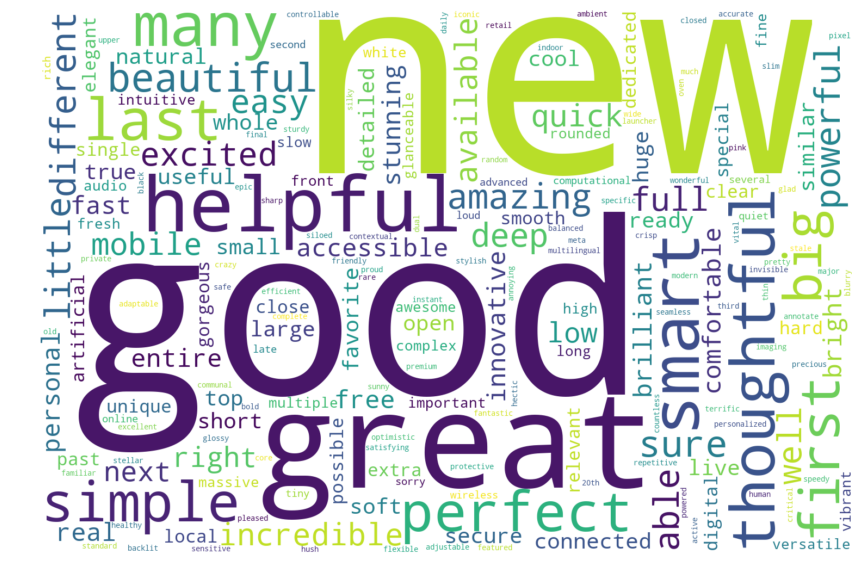

Google-2019


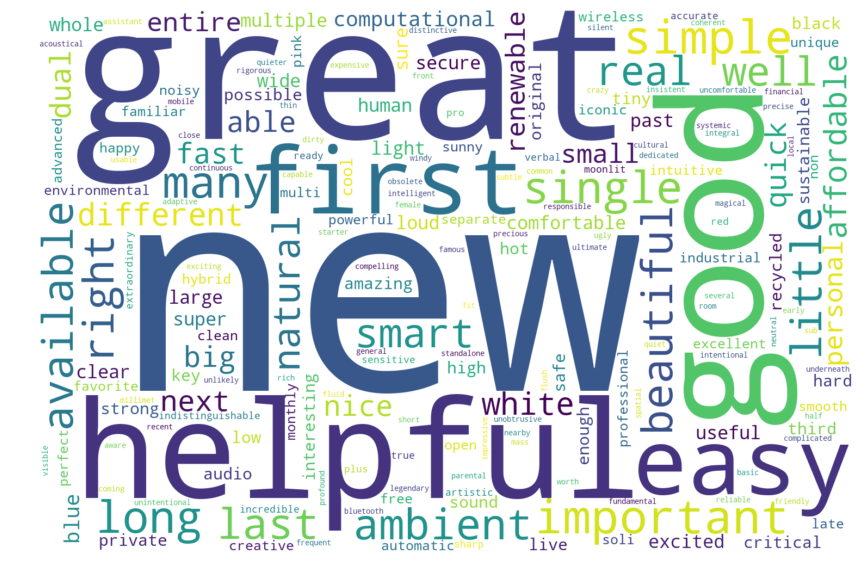

In [7]:
#word cloud of adjectives in google speech
adjective_google_2018=' '.join([str(elem) for elem in adjectives_array[0]])
show_word_cloud(file_names[0],adjective_google_2018)

adjective_google_2019=' '.join([str(elem) for elem in adjectives_array[1]])
show_word_cloud(file_names[1],adjective_google_2019)

Apple-2018


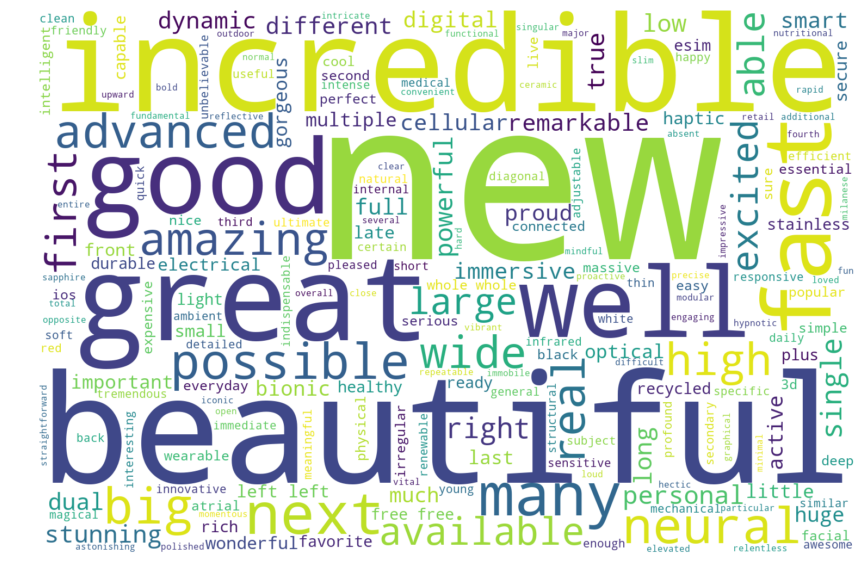

Apple-2019


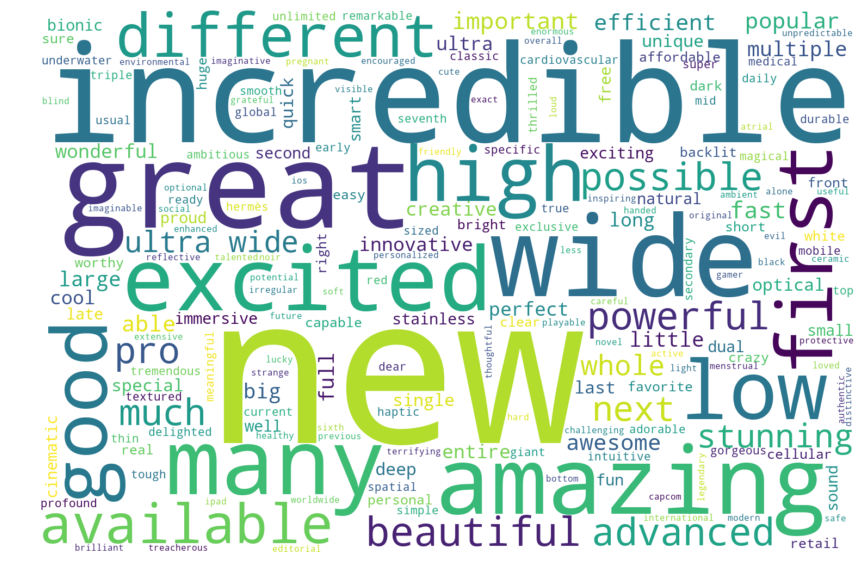

In [8]:
#word cloud of adjectives in apple speech
adjective_apple_2018=' '.join([str(elem) for elem in adjectives_array[2]])
show_word_cloud(file_names[2],adjective_apple_2018)

adjective_apple_2019=' '.join([str(elem) for elem in adjectives_array[3]])
show_word_cloud(file_names[3],adjective_apple_2019)

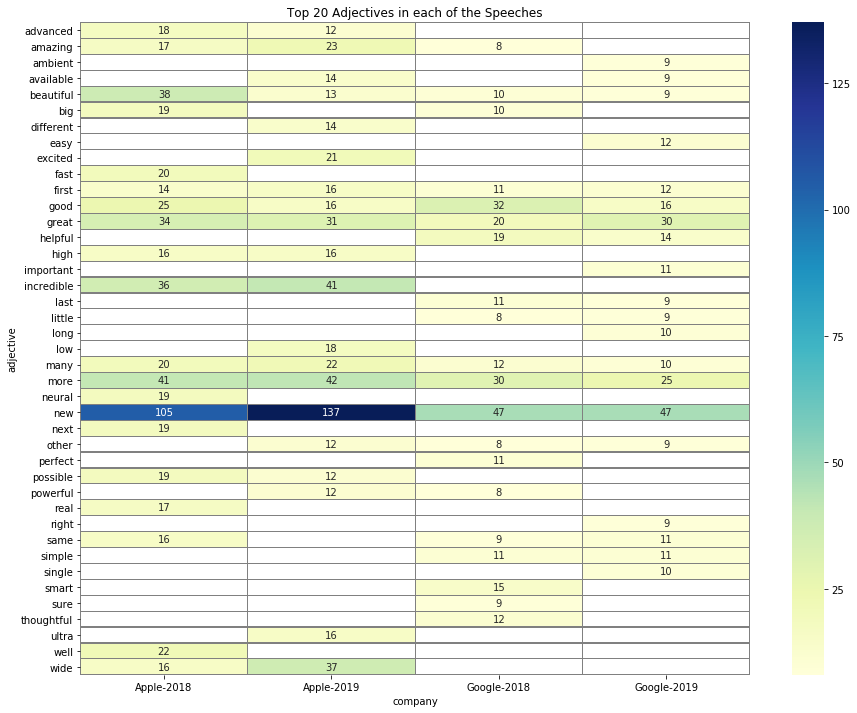

In [9]:
#Plotting most used adjectives in each of the speeches
top_adjective_count=20

freq=Counter(adjectives_array[0])
df=pd.DataFrame(freq.most_common(top_adjective_count),columns=['adjective','count'])
df=df.apply(lambda x: x.astype(str).str.lower())
df['count'] = pd.to_numeric(df['count'])
df['company']='Google-2018'

freq1=Counter(adjectives_array[1])
df1=pd.DataFrame(freq1.most_common(top_adjective_count),columns=['adjective','count'])
df1['count'] = pd.to_numeric(df1['count'])
df1['company']='Google-2019'

freq2=Counter(adjectives_array[2])
df2=pd.DataFrame(freq2.most_common(top_adjective_count),columns=['adjective','count'])
df2['count'] = pd.to_numeric(df2['count'])
df2['company']='Apple-2018'

freq3=Counter(adjectives_array[3])
df3=pd.DataFrame(freq3.most_common(top_adjective_count),columns=['adjective','count'])
df3['count'] = pd.to_numeric(df3['count'])
df3['company']='Apple-2019'

final_df=pd.concat([df,df1,df2,df3])

plot_data = final_df.pivot("adjective", "company", "count")

chart_title="Top "+str(top_adjective_count)+" Adjectives in each of the Speeches"
f, ax = plt.subplots(figsize=(15, 12))
ax.set_title(chart_title)
sns.heatmap(plot_data, annot=True, fmt=".0f", linewidths=.2,linecolor='grey', ax=ax,cmap="YlGnBu")

**Observations**
* Its evident that Apple uses the word "new" more frequently in its presentation
* Occurence of word "ultra" and "wide" is more in Apple's 2019 speech due to new wide and ultra wide lenses introduced in iPhone 11 Pro
* Google is not using the words "incredible" and "advanced" as frequent as Apple does
* Surprisingly the word "smart" is not much used in speeches (with exception of Google's 2018 speech) 

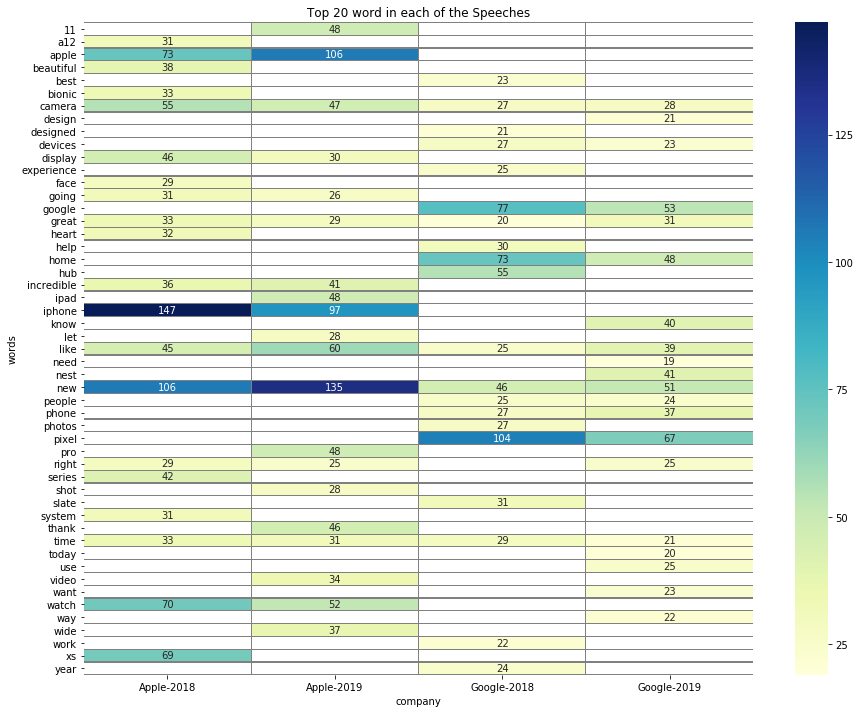

In [10]:
#Plotting most used words in each of the speeches
file_content_array[0]=re.sub('\n',' ',file_content_array[0])
file_content_array[1]=re.sub('\n',' ',file_content_array[1])
file_content_array[2]=re.sub('\n',' ',file_content_array[2])
file_content_array[3]=re.sub('\n',' ',file_content_array[3])

file_content_array[0]=file_content_array[0].lower()
file_content_array[1]=file_content_array[1].lower()
file_content_array[2]=file_content_array[2].lower()
file_content_array[3]=file_content_array[3].lower()

added_stopwords=['.',',','-','3','!','4','_','"','--','?',"we're","we've","you're","yeah","tim"]
for w in added_stopwords:
    nlp.vocab[w].is_stop = True
    lex = nlp.vocab[w]
    lex.is_stop = True

doc = nlp(file_content_array[0])
tokens = [token.text for token in doc if not token.is_stop and token.text.strip()!='']

top_words_count=20
freq=Counter(tokens)
df=pd.DataFrame(freq.most_common(top_words_count),columns=['words','count'])
df=df.apply(lambda x: x.astype(str).str.lower())
df['count'] = pd.to_numeric(df['count'])
df['company']='Google-2018'

doc = nlp(file_content_array[1])
tokens = [token.text.strip() for token in doc if not token.is_stop and token.text.strip()!='']

freq=Counter(tokens)
df1=pd.DataFrame(freq.most_common(top_words_count),columns=['words','count'])
df1=df1.apply(lambda x: x.astype(str).str.lower())
df1['count'] = pd.to_numeric(df1['count'])
df1['company']='Google-2019'

doc = nlp(file_content_array[2])
tokens = [token.text for token in doc if not token.is_stop and token.text.strip()!='']

freq=Counter(tokens)
df2=pd.DataFrame(freq.most_common(top_words_count),columns=['words','count'])
df2=df2.apply(lambda x: x.astype(str).str.lower())
df2['count'] = pd.to_numeric(df2['count'])
df2['company']='Apple-2018'

doc = nlp(file_content_array[3])
tokens = [token.text for token in doc if not token.is_stop and token.text.strip()!='']

freq=Counter(tokens)
df3=pd.DataFrame(freq.most_common(top_words_count),columns=['words','count'])
df3=df3.apply(lambda x: x.astype(str).str.lower())
df3['count'] = pd.to_numeric(df3['count'])
df3['company']='Apple-2019'

final_df=pd.concat([df,df1,df2,df3])

plot_data=pd.pivot_table(final_df,values='count',index='words',columns='company')

chart_title="Top "+str(top_words_count)+" word in each of the Speeches"
f, ax = plt.subplots(figsize=(15, 12))
ax.set_title(chart_title)
sns.heatmap(plot_data, annot=True, fmt=".0f", linewidths=.2,linecolor='grey', ax=ax,cmap="YlGnBu")

**Observations**
* 11 and Pro appeared in Apple-2019 speech because, well iPhone 11 and iPhone 11 Pro were launched in 2019 only;)
* The word "bionic" refers to Apple's processors thats why it does not appear in Google' speeches
* The word "watch" is only Apple' speeches because they release Apple Watch each year and Google does not have any Watch in their product line-up.
* Similarly, words "home","hub","slate" and "nest" are only in Google's speeches because these all are Google products

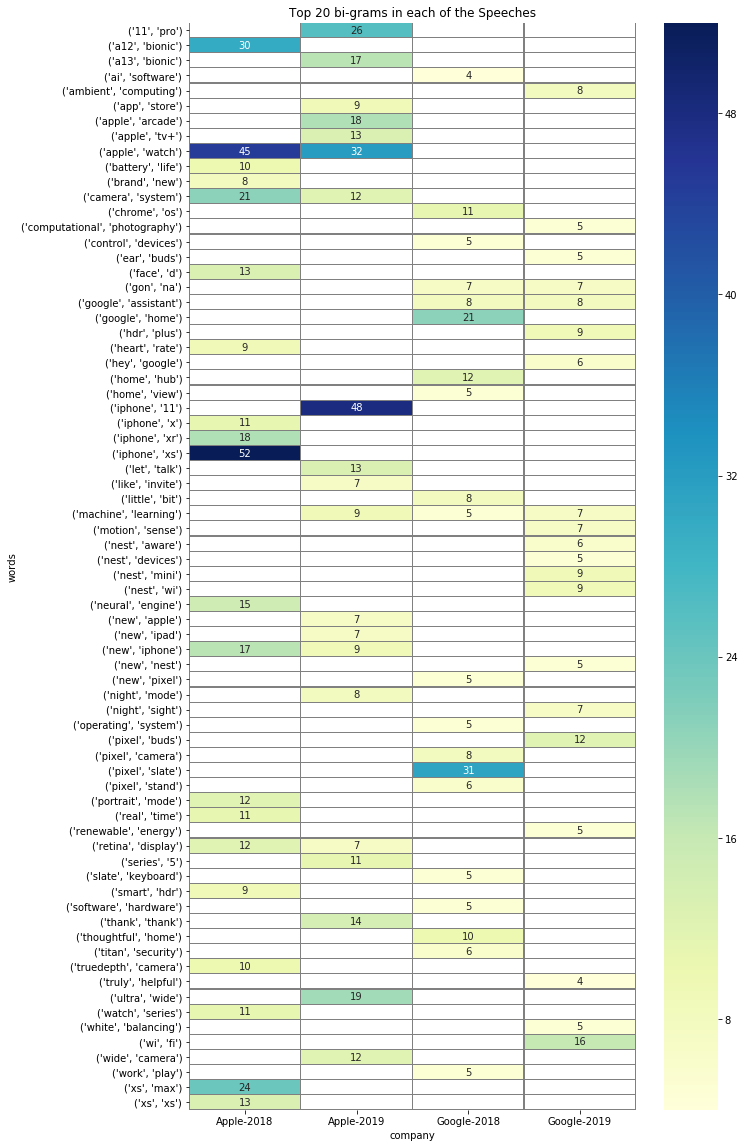

In [11]:
#most frequent bi-grams - pair of words appearing most number of time in the speeches
doc = nlp(file_content_array[0])
tokens = [token.text for token in doc if not token.is_stop and token.text.strip()!='']

top_bigram_count=10
bigrams = zip(tokens, tokens[1:])
freq=Counter(bigrams)
df=pd.DataFrame(freq.most_common(top_words_count),columns=['words','count'])
df=df.apply(lambda x: x.astype(str).str.lower())
df['count'] = pd.to_numeric(df['count'])
df['company']='Google-2018'

doc = nlp(file_content_array[1])
tokens = [token.text.strip() for token in doc if not token.is_stop and token.text.strip()!='']

bigrams = zip(tokens, tokens[1:])
freq=Counter(bigrams)
df1=pd.DataFrame(freq.most_common(top_words_count),columns=['words','count'])
df1=df1.apply(lambda x: x.astype(str).str.lower())
df1['count'] = pd.to_numeric(df1['count'])
df1['company']='Google-2019'

doc = nlp(file_content_array[2])
tokens = [token.text for token in doc if not token.is_stop and token.text.strip()!='']

bigrams = zip(tokens, tokens[1:])
freq=Counter(bigrams)
df2=pd.DataFrame(freq.most_common(top_words_count),columns=['words','count'])
df2=df2.apply(lambda x: x.astype(str).str.lower())
df2['count'] = pd.to_numeric(df2['count'])
df2['company']='Apple-2018'

doc = nlp(file_content_array[3])
tokens = [token.text for token in doc if not token.is_stop and token.text.strip()!='']

bigrams = zip(tokens, tokens[1:])
freq=Counter(bigrams)
df3=pd.DataFrame(freq.most_common(top_words_count),columns=['words','count'])
df3=df3.apply(lambda x: x.astype(str).str.lower())
df3['count'] = pd.to_numeric(df3['count'])
df3['company']='Apple-2019'

final_df=pd.concat([df,df1,df2,df3])

plot_data=pd.pivot_table(final_df,values='count',index='words',columns='company')

chart_title="Top "+str(top_words_count)+" bi-grams in each of the Speeches"
f, ax = plt.subplots(figsize=(10, 20))
ax.set_title(chart_title)
sns.heatmap(plot_data, annot=True, fmt=".0f", linewidths=.2,linecolor='grey', ax=ax,cmap="YlGnBu")

**Observations**
* With bi-grams it is very easy to find out the products launched by each company and also the most talked about features
* Low light photography is named "Night Mode" in Apple and Google calls it "Night Sight"
* Apple mentioned "Portrait Mode" more than Google
* HDR is called as "Smart HDR" by Apple and same is named as "HDR Plus"  by Google and both appeared exactly 9 times
* Apple mentioned "A13 Bionic" less number of times than "A12 Bionic"
* "Motion Sense" appeared in Google's 2019 speech because they launched Pixel 4 with that technology
* Apple mentioned "Machine Learning" 9 times in 2019 where as, Google mentioned it only 5 and 7 times in 2018 and 2019 respectively

In [12]:
#Now, with all the 4 speeches, lets try to generate random sentences using Markovify
#https://github.com/jsvine/markovify
with open(base_dir_of_subtitles+"Google-2018.txt") as f:
    text = f.read()

with open(base_dir_of_subtitles+"Apple-2018.txt") as f:
    text2 = f.read()

with open(base_dir_of_subtitles+"Google-2019.txt") as f:
    text3 = f.read()

with open(base_dir_of_subtitles+"Apple-2019.txt") as f:
    text4 = f.read()
    
text_model = markovify.Text(text)
text_model2 = markovify.Text(text2)
text_model3 = markovify.Text(text3)
text_model4 = markovify.Text(text4)

model_combo = markovify.combine([ text_model, text_model2,text_model3,text_model4 ], [1,1,1,1])

# Print five randomly-generated sentences
for i in range(5):
    print(str(i+1)+" : "+model_combo.make_sentence())

1 : This collection of awesome games covers so many incredible new camera system.
2 : Customers love iPhone, and we think it's great.
3 : Nest also has the highest quality video at twice as much fun on the same all-day 18-hour battery life.
4 : This is the toughest glass on a new iPhone XS, iPhone XS and XS Max, it's faster algorithms, running on a single physical SIM and a half longer in your home.
5 : Today I am so excited about how something looks.


* **I am always amazed how sometimes these random generated sentences make total sense. **
* **To test it yourself, download this piece of code and try on your local machine, I am sure you will be surprised with results**

***EOF***